In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('fake.csv')

In [3]:
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
data.shape

(17881, 18)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17881 entries, 0 to 17880
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17881 non-null  int64 
 1   title                17881 non-null  object
 2   location             17535 non-null  object
 3   department           6334 non-null   object
 4   salary_range         2869 non-null   object
 5   company_profile      14573 non-null  object
 6   description          17880 non-null  object
 7   requirements         15186 non-null  object
 8   benefits             10671 non-null  object
 9   telecommuting        17881 non-null  int64 
 10  has_company_logo     17881 non-null  int64 
 11  has_questions        17881 non-null  int64 
 12  employment_type      14410 non-null  object
 13  required_experience  10831 non-null  object
 14  required_education   9776 non-null   object
 15  industry             12978 non-null  object
 16  func

In [6]:
data.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

# Data Pre-processing

In [7]:
# Deal with missing values and drop unneccessary columns

# Location missing values will be assigned none
data['location'] = data.location.fillna('none')

# department missing values will be assigned not specified
data['department'] = data.department.fillna('not specified')

# drop salary range, benefits, telecommuting, has_questions (not compulsory) in the context of Nigeria
data.drop(['salary_range', 'benefits','telecommuting','has_questions'],
             axis=1, inplace=True)

# Company profile missing values will be assigned none
data['company_profile'] = data.company_profile.fillna('none')

# Company profile missing values will be assigned not specified
data['requirements'] = data.requirements.fillna('not specified')

# employment_type missing values will be assigned not specified
data['employment_type'] = data.employment_type.fillna('not specified')

# required_experience missing values will be assigned not specified
data['required_experience'] = data.required_experience.fillna('not specified')

# required_education missing values will be assigned not specified
data['required_education'] = data.required_education.fillna('not specified')

# industry missing values will be assigned not specified
data['industry'] = data.industry.fillna('not specified')

# function missing values will be assigned not specified
data['function'] = data.function.fillna('not specified')

In [8]:
data.isnull().sum()

job_id                 0
title                  0
location               0
department             0
company_profile        0
description            1
requirements           0
has_company_logo       0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [9]:
data.head()

,job_id,title,location,department,company_profile,description,requirements,has_company_logo,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,1,Other,Internship,not specified,not specified,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,1,Full-time,Not Applicable,not specified,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",not specified,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,1,not specified,not specified,not specified,not specified,not specified,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",1,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",not specified,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [10]:
data.columns

Index(['job_id', 'title', 'location', 'department', 'company_profile',
       'description', 'requirements', 'has_company_logo', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [11]:
print('Data set:')
for col_name in data.columns:
    if data[col_name].dtypes == 'object' :
        unique_cat = len(data[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

print()

Data set:
Feature 'title' has 11231 categories
Feature 'location' has 3107 categories
Feature 'department' has 1338 categories
Feature 'company_profile' has 1711 categories
Feature 'description' has 14803 categories
Feature 'requirements' has 11968 categories
Feature 'employment_type' has 6 categories
Feature 'required_experience' has 8 categories
Feature 'required_education' has 14 categories
Feature 'industry' has 132 categories
Feature 'function' has 38 categories



In [12]:
df = data[['title', 'location','company_profile', 'requirements', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent']]

In [13]:
# Check if there is any null value
df.isna().apply(pd.value_counts)

,title,location,company_profile,requirements,employment_type,required_experience,required_education,industry,function,fraudulent
False,17881,17881,17881,17881,17881,17881,17881,17881,17881,17881


In [14]:
#Check for number of null values
df.isnull().sum()

title                  0
location               0
company_profile        0
requirements           0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [15]:
df_num = df[['fraudulent']]
df_cat = df[['title', 'location','company_profile', 'requirements','employment_type',
       'required_experience', 'required_education', 'industry', 'function']]

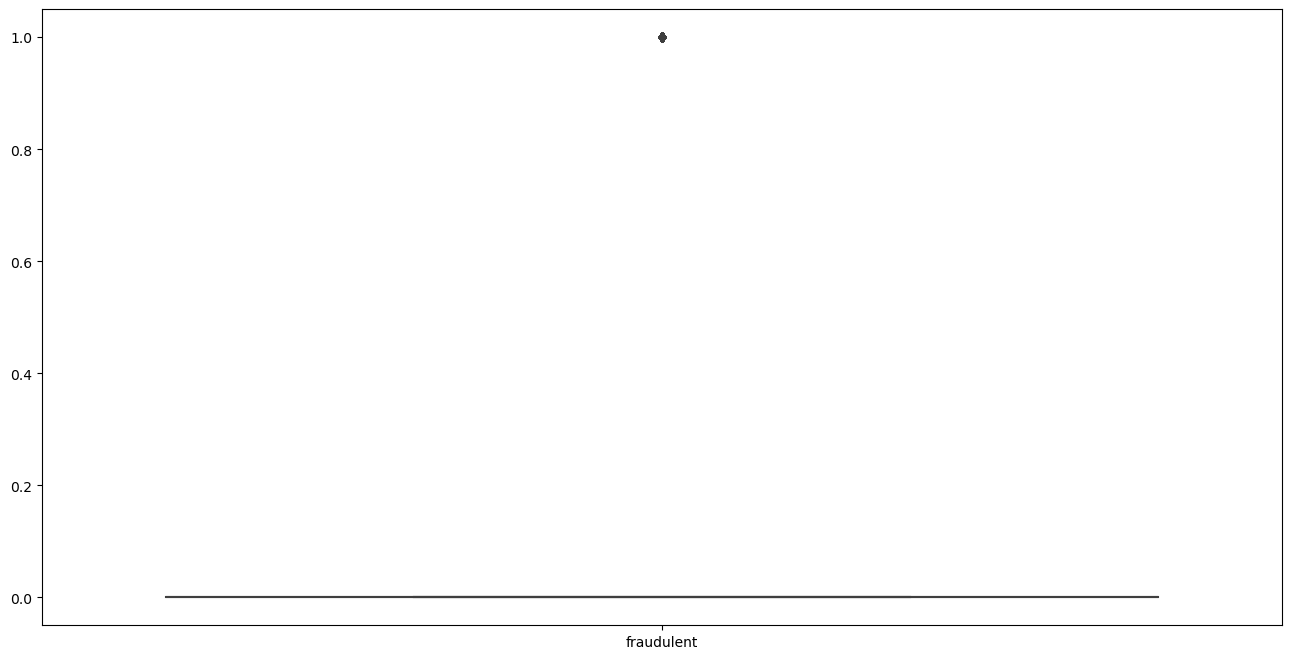

In [16]:
# Checking for Outliers in numerical data
plt.figure(figsize=[16,8])
sns.boxplot(data = df_num)
plt.show()

In [17]:
#Removing Outliers from columns
df_num = df_num[df_num['fraudulent'] < 0.9 ]

In [18]:
df.shape

(17881, 10)

In [19]:
#fig, axes = plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
#plt.tight_layout()

#df["fraudulent"].value_counts().plot(kind='pie', ax=axes[0], labels=['Real Post (95%)', 'Fake Post (5%)'])
#temp = df["fraudulent"].value_counts()
#sns.barplot(temp.index, temp, ax=axes[1])

#axes[0].set_ylabel(' ')
#axes[1].set_ylabel(' ')
#axes[1].set_xticklabels(["Real Post (17014) [0's]", "Fake Post (866) [1's]"])

#axes[0].set_title('Target Distribution in Dataset', fontsize=13)
#axes[1].set_title('Target Count in Dataset', fontsize=13)

#plt.show()

C:\Users\madhu\AppData\Local\Temp\ipykernel_15468\2633321715.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels,  fontsize=10)
C:\Users\madhu\AppData\Local\Temp\ipykernel_15468\2633321715.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels,  fontsize=10)
C:\Users\madhu\AppData\Local\Temp\ipykernel_15468\2633321715.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels,  fontsize=10)
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


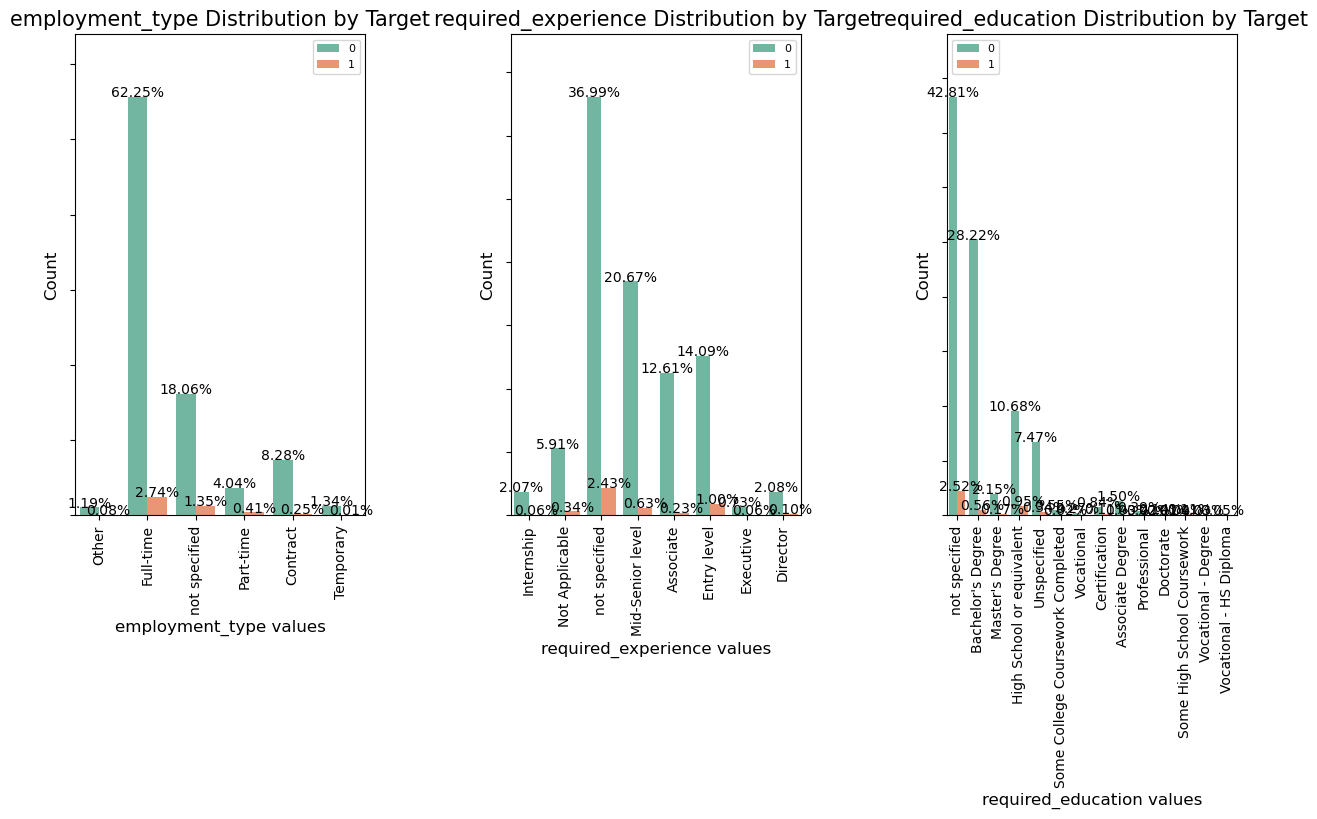

In [20]:
cat_cols = ["employment_type", "required_experience", "required_education",]
# visualizating catagorical variable by target
import matplotlib.gridspec as gridspec # to do the grid of plots
grid = gridspec.GridSpec(3, 3, wspace=0.5, hspace=0.5) # The grid of chart
plt.figure(figsize=(15,25)) # size of figure

# loop to get column and the count of plots
for n, col in enumerate(df[cat_cols]): 
    ax = plt.subplot(grid[n]) # feeding the figure of grid
    sns.countplot(x=col, data=df, hue='fraudulent', palette='Set2') 
    ax.set_ylabel('Count', fontsize=12) # y axis label
    ax.set_title(f'{col} Distribution by Target', fontsize=15) # title label
    ax.set_xlabel(f'{col} values', fontsize=12) # x axis label
    xlabels = ax.get_xticklabels() 
    ylabels = ax.get_yticklabels() 
    ax.set_xticklabels(xlabels,  fontsize=10)
    ax.set_yticklabels(ylabels,  fontsize=10)
    plt.legend(fontsize=8)
    plt.xticks(rotation=90) 
    total = len(df)
    sizes=[] # Get highest values in y
    for p in ax.patches: # loop to all objects
        height = p.get_height()
        sizes.append(height)
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total*100),
                ha="center", fontsize=10) 
    ax.set_ylim(0, max(sizes) * 1.15) #set y limit based on highest heights


plt.show()

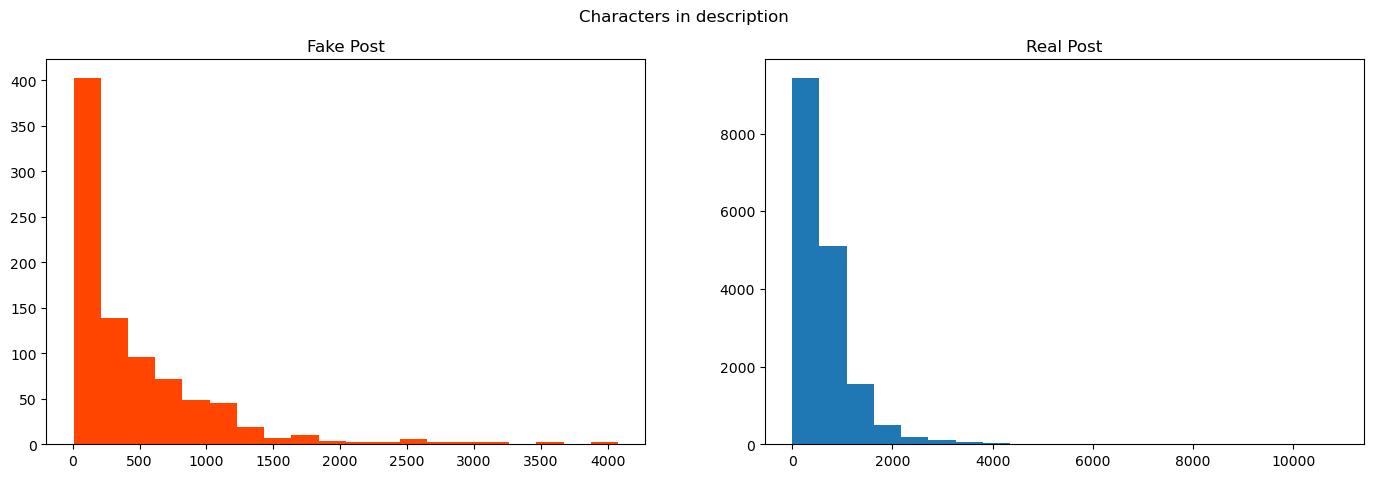

In [21]:
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
length=df[df["fraudulent"]==1]['requirements'].str.len()
ax1.hist(length,bins = 20,color='orangered')
ax1.set_title('Fake Post')
length=df[df["fraudulent"]==0]['requirements'].str.len()
ax2.hist(length, bins = 20)
ax2.set_title('Real Post')
fig.suptitle('Characters in description')
plt.show()

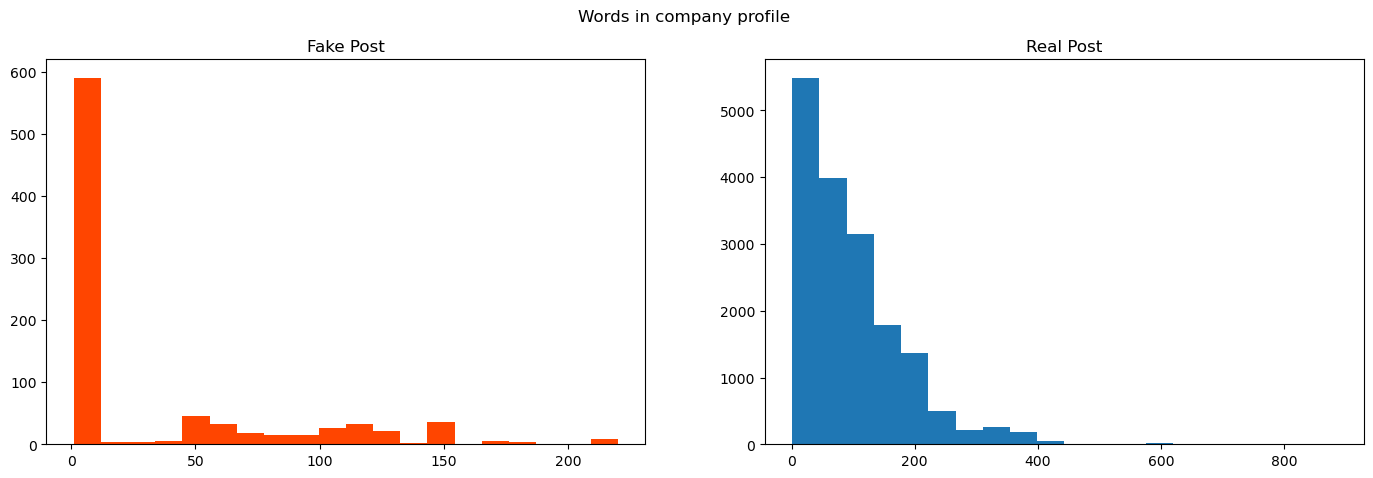

In [22]:
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
num=df[df["fraudulent"]==1]['company_profile'].str.split().map(lambda x: len(x))
ax1.hist(num,bins = 20,color='orangered')
ax1.set_title('Fake Post')
num=df[df["fraudulent"]==0]['company_profile'].str.split().map(lambda x: len(x))
ax2.hist(num, bins = 20)
ax2.set_title('Real Post')
fig.suptitle('Words in company profile')
plt.show()

In [23]:
df['fraudulent'].values

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [24]:
fraud = df[df['fraudulent']== 1]
fraud.shape

(866, 10)

In [25]:
not_fraud = df[df['fraudulent']== 0]
not_fraud.shape

(17015, 10)

In [26]:
fraud = fraud.sample(1403, replace=True)
fraud.shape, not_fraud.shape

((1403, 10), (17015, 10))

In [27]:
df = fraud.append(not_fraud)
df.reset_index()

C:\Users\madhu\AppData\Local\Temp\ipykernel_15468\3513025948.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = fraud.append(not_fraud)


,index,title,location,company_profile,requirements,employment_type,required_experience,required_education,industry,function,fraudulent
0,17755,Administrative Clerk,"US, ,",none,"Positive attitude, Excellent telephone skills,...",Full-time,Not Applicable,Unspecified,Business Supplies and Equipment,Administrative,1
1,17671,Home Based Payroll Typist/Data Entry Clerks Po...,"US, MS, Aberdeen",none,"Basic computer and typing skills, ability to s...",not specified,not specified,not specified,not specified,not specified,1
2,17819,Data Entry,"US, MD, Baltimore",none,not specified,Full-time,Entry level,Unspecified,Hospital & Health Care,Administrative,1
3,1867,SURF (Subsea Umbilical Riser Flowline) Develop...,"US, TX, Houston",Aker Solutions is a global provider of product...,Qualifications &amp; personal attributes- Bach...,Full-time,Mid-Senior level,Bachelor's Degree,Oil & Energy,Engineering,1
4,6961,Food and Beverage Manager,"MY, ,",none,"Skills Required: * Budgeting, planning and ...",not specified,not specified,not specified,not specified,not specified,1
...,...,...,...,...,...,...,...,...,...,...,...
18413,17876,Payroll Accountant,"US, PA, Philadelphia",WebLinc is the e-commerce platform and service...,- B.A. or B.S. in Accounting- Desire to have f...,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
18414,17877,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",We Provide Full Time Permanent Positions for m...,At least 12 years professional experience.Abil...,Full-time,not specified,not specified,not specified,not specified,0
18415,17878,Graphic Designer,"NG, LA, Lagos",none,1. Must be fluent in the latest versions of Co...,Contract,Not Applicable,Professional,Graphic Design,Design,0
18416,17879,Web Application Developers,"NZ, N, Wellington",Vend is looking for some awesome new talent to...,We want to hear from you if:You have an in-dep...,Full-time,Mid-Senior level,not specified,Computer Software,Engineering,0


In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['title'] = le.fit_transform(df['title'])
df['location'] = le.fit_transform(df['location'])
df['company_profile'] = le.fit_transform(df['company_profile'])
df['requirements'] = le.fit_transform(df['requirements'])
df['employment_type'] = le.fit_transform(df['employment_type'])
df['required_experience'] = le.fit_transform(df['required_experience'])
df['required_education'] = le.fit_transform(df['required_education'])
df['industry'] = le.fit_transform(df['industry'])
df['function'] = le.fit_transform(df['function'])

In [29]:
df = df.reset_index()
df.head()

,index,title,location,company_profile,requirements,employment_type,required_experience,required_education,industry,function,fraudulent
0,17755,462,1246,1669,6157,1,6,9,12,1,1
1,17671,4426,2254,1669,2363,5,7,13,131,37,1
2,17819,2407,2078,1669,11426,1,2,9,51,1,1
3,1867,8270,2842,125,6543,1,5,1,88,12,1
4,6961,3595,1028,1669,8334,5,7,13,131,37,1


In [30]:
from sklearn.model_selection import train_test_split

X = df[['index', 'title', 'location', 'company_profile', 'requirements',
       'employment_type','required_experience', 'required_education', 'industry', 'function']].values
Y = df[['fraudulent']].values


In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [32]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((13813, 10), (4605, 10), (13813, 1), (4605, 1))

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score

In [34]:
import warnings
warnings.filterwarnings('ignore')


In [35]:
### Logistic Regression

clf=LogisticRegression()
clf.fit(X_train, Y_train)
preds=clf.predict(X_test)
print('accuracy with Logistic Regression:',accuracy_score(Y_test, preds), '%')

### Random Forest

clf1=RandomForestClassifier()
clf1.fit(X_train, Y_train)
preds=clf1.predict(X_test)
print('accuracy with Random Forest:',accuracy_score(Y_test, preds), '%')

### Support Vector Machine

clf=SVC()
clf.fit(X_train, Y_train)
preds=clf.predict(X_test)
print('accuracy with Support Vector Machine:',accuracy_score(Y_test, preds), '%')

### Decision Tree

clf=DecisionTreeClassifier()
clf.fit(X_train, Y_train)
preds=clf.predict(X_test)
print('accuracy with Decision Tree:',accuracy_score(Y_test, preds), '%')

### K-Nearest Neighbors

clf=KNeighborsClassifier()
clf.fit(X_train, Y_train)
preds=clf.predict(X_test)
print('accuracy with K-Nearest Neighbors :',accuracy_score(Y_test, preds), '%')

### Naive Bayes

clf=GaussianNB()
clf.fit(X_train, Y_train)
preds=clf.predict(X_test)
print('accuracy with Naive Bayes:',accuracy_score(Y_test, preds), '%')


accuracy with Logistic Regression: 0.9261672095548317 %
accuracy with Random Forest: 0.9921824104234528 %
accuracy with Support Vector Machine: 0.9259500542888165 %
accuracy with Decision Tree: 0.9839305103148751 %
accuracy with K-Nearest Neighbors : 0.9426710097719869 %
accuracy with Naive Bayes: 0.9307274701411509 %


In [36]:
test_vector = np.reshape(np.asarray([17614,5362,1393,1669,11417,1,7,13,75,37]),(1,10))
p = int(clf1.predict(test_vector)[0])

if p==0:
    print('Job profile is Real')
else:
    print('Job profile is fake')


Job profile is fake


In [37]:
test_vector = np.reshape(np.asarray([17500,4362,1293,1009,10417,1,7,10,79,32]),(1,10))
p = int(clf.predict(test_vector)[0])

if p==0:
    print('Job profile is Real')
else:
    print('Job profile is fake')


Job profile is Real


In [38]:
df.tail()

,index,title,location,company_profile,requirements,employment_type,required_experience,required_education,industry,function,fraudulent
18413,17876,7054,2704,1542,148,1,5,1,61,0,0
18414,17877,7526,2842,1426,1781,1,7,13,131,37,0
18415,17878,4077,1041,1669,436,0,6,6,48,9,0
18416,17879,10825,1088,1387,10170,1,5,13,22,12,0
18417,17880,5370,1219,573,9172,1,2,1,58,18,0


In [39]:
df['index']==17880

0        False
1        False
2        False
3        False
4        False
         ...  
18413    False
18414    False
18415    False
18416    False
18417     True
Name: index, Length: 18418, dtype: bool

In [40]:
X

array([[17755,   462,  1246, ...,     9,    12,     1],
       [17671,  4426,  2254, ...,    13,   131,    37],
       [17819,  2407,  2078, ...,     9,    51,     1],
       ...,
       [17878,  4077,  1041, ...,     6,    48,     9],
       [17879, 10825,  1088, ...,    13,    22,    12],
       [17880,  5370,  1219, ...,     1,    58,    18]], dtype=int64)

In [41]:
test_vector = np.reshape(np.asarray([17880,5374,1220,574,9164,1,2,1,58,18]),(1,10))
p = int(clf1.predict(test_vector)[0])

if p==0:
    print('Job profile is Real')
else:
    print('Job profile is fake')

Job profile is Real
